In [1]:
from scipy import ndimage
#from scipy.optimize import curve_fit
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import gdal
%matplotlib inline

In [2]:
f = 'SENTINEL2A_20200927-105922-256_L2B-SNOW_T30TYN_C_V1-7/SENTINEL2A_20200927-105922-256_L2B-SNOW_T30TYN_C_V1-7_SNW_R2.tif'

In [3]:
I = np.array(Image.open(f))#[1600:1700, 800:1200]

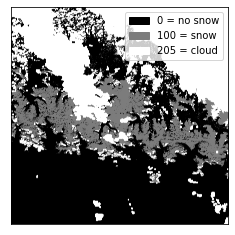

In [4]:
im = plt.imshow(I,'gray')
labels = ['0 = no snow','100 = snow','205 = cloud']
values = [0,100,205]

# add legend (https://stackoverflow.com/a/40666123)
colors = [ im.cmap(im.norm(value)) for value in values]
patches = [ mpatches.Patch(color=colors[i], label=labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.show()

In [5]:
# 0 no-swow, 1 snow, 2 cloud
S = (I==100).astype(int)
C = (I==205).astype(int)

In [6]:
edgesSnowIn = S - ndimage.binary_erosion(S)
edgesCloudOut = abs(C - ndimage.binary_dilation(C))

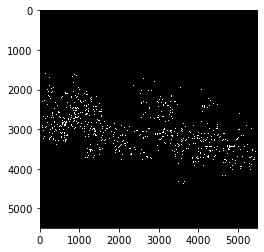

In [7]:
snowline = (edgesSnowIn==1) & (edgesCloudOut==0)
plt.imshow(snowline,'gray',interpolation='none')

In [8]:
fdem = 'DEM_30TYN.tif'
Z = np.array(Image.open(fdem))#[1600:1700, 800:1200]

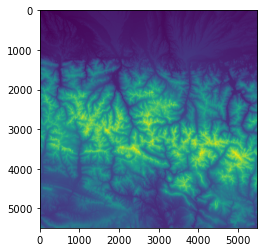

In [9]:
plt.imshow(Z)

In [10]:
Zsnowline = Z[snowline]
ZsnowlineWithCloud = Z[(edgesSnowIn==1)]

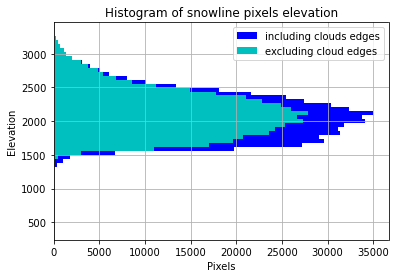

In [11]:
plt.hist(ZsnowlineWithCloud, 50, facecolor='b', alpha=1, label='including clouds edges', orientation='horizontal')
plt.hist(Zsnowline, 50, facecolor='c', alpha=1, label='excluding cloud edges', orientation='horizontal')
plt.ylabel('Elevation')
plt.xlabel('Pixels')
plt.title('Histogram of snowline pixels elevation')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
gtif = gdal.Open(fdem)

In [13]:
geoMatrix = gtif.GetGeoTransform()

In [14]:
ulx = geoMatrix[0]
uly = geoMatrix[3]
xd = geoMatrix[1]
yd = geoMatrix[5]
nx = gtif.RasterXSize
ny = gtif.RasterYSize
# upper right corner x coordinate
urx = ulx+xd*nx
# lower left corner y coordinate
lly = uly+yd*ny

In [15]:
# create northing and easting array of pixel centers
x = np.linspace(ulx+xd/2, urx-xd/2, nx)
y = np.linspace(uly+yd/2, lly-yd/2, ny)
X, Y = np.meshgrid(x, y, indexing='xy')

In [16]:
# extract northing of snowline pixels
Ysnowline = Y[snowline]

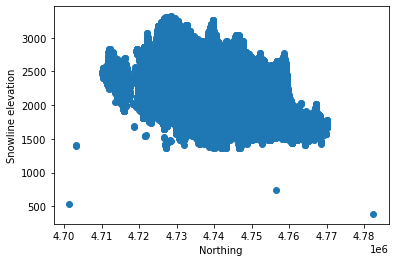

In [17]:
plt.scatter(Ysnowline, Zsnowline)
plt.xlabel('Northing')
plt.ylabel('Snowline elevation')
plt.show()

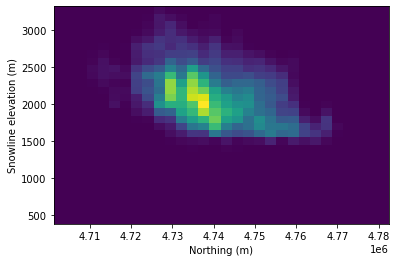

In [18]:
plt.hist2d(Ysnowline, Zsnowline, bins=(30, 30))
plt.xlabel('Northing (m)')
plt.ylabel('Snowline elevation (m)')
plt.show()

In [19]:
ZOnsnowline = np.where(snowline,Z,np.nan)
p90 = np.nanpercentile(ZOnsnowline,10,axis=1)

/Users/gascoins/Apps/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


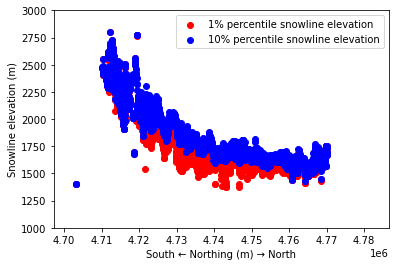

In [20]:
p10 = np.nanpercentile(ZOnsnowline,10,axis=1)
p1 = np.nanpercentile(ZOnsnowline,1,axis=1)
plt.scatter(y,p1,c='r',label='1% percentile snowline elevation')
plt.scatter(y,p10,c='b',label='10% percentile snowline elevation')
plt.xlabel('South ← Northing (m) → North')
plt.ylabel('Snowline elevation (m)')
plt.legend()
plt.ylim(1000,3000)
plt.show()

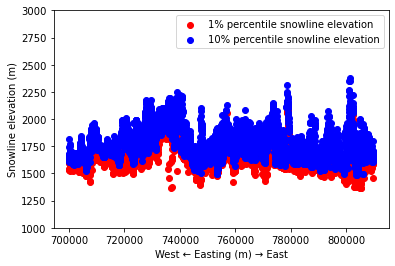

In [21]:
p10 = np.nanpercentile(ZOnsnowline,10,axis=0)
p1 = np.nanpercentile(ZOnsnowline,1,axis=0)
plt.scatter(x,p1,c='r',label='1% percentile snowline elevation')
plt.scatter(x,p10,c='b',label='10% percentile snowline elevation')
plt.xlabel('West ← Easting (m) → East')
plt.ylabel('Snowline elevation (m)')
plt.legend()
plt.ylim(1000,3000)
plt.show()

In [22]:
f = 'SENTINEL2A_20200927-105918-371_L2B-SNOW_T31TCH_C_V1-7/SENTINEL2A_20200927-105918-371_L2B-SNOW_T31TCH_C_V1-7_SNW_R2.tif'

In [23]:
I = np.array(Image.open(f))#[1600:1700, 800:1200]

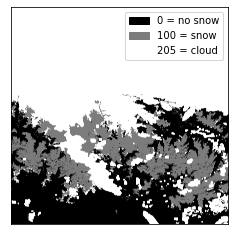

In [24]:
im = plt.imshow(I,'gray')
labels = ['0 = no snow','100 = snow','205 = cloud']
values = [0,100,205]

# add legend (https://stackoverflow.com/a/40666123)
colors = [ im.cmap(im.norm(value)) for value in values]
patches = [ mpatches.Patch(color=colors[i], label=labels[i] ) for i in range(len(values)) ]
plt.legend(handles=patches)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.show()

In [25]:
# 0 no-swow, 1 snow, 2 cloud
S = (I==100).astype(int)
C = (I==205).astype(int)

In [26]:
edgesSnowIn = S - ndimage.binary_erosion(S)
edgesCloudOut = abs(C - ndimage.binary_dilation(C))

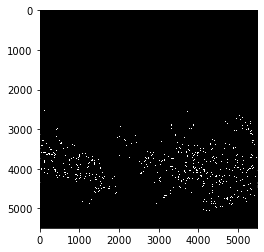

In [27]:
snowline = (edgesSnowIn==1) & (edgesCloudOut==0)
plt.imshow(snowline,'gray',interpolation='none')

In [28]:
fdem = 'DEM_31TCH.tif'
Z = np.array(Image.open(fdem))#[1600:1700, 800:1200]

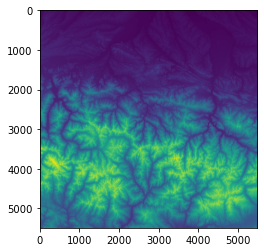

In [29]:
plt.imshow(Z)

In [30]:
Zsnowline = Z[snowline]
ZsnowlineWithCloud = Z[(edgesSnowIn==1)]

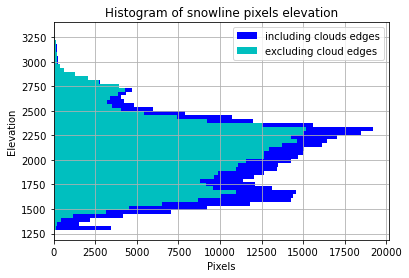

In [31]:
plt.hist(ZsnowlineWithCloud, 50, facecolor='b', alpha=1, label='including clouds edges', orientation='horizontal')
plt.hist(Zsnowline, 50, facecolor='c', alpha=1, label='excluding cloud edges', orientation='horizontal')
plt.ylabel('Elevation')
plt.xlabel('Pixels')
plt.title('Histogram of snowline pixels elevation')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
gtif = gdal.Open(fdem)

In [33]:
geoMatrix = gtif.GetGeoTransform()

In [34]:
ulx = geoMatrix[0]
uly = geoMatrix[3]
xd = geoMatrix[1]
yd = geoMatrix[5]
nx = gtif.RasterXSize
ny = gtif.RasterYSize
# upper right corner x coordinate
urx = ulx+xd*nx
# lower left corner y coordinate
lly = uly+yd*ny

In [35]:
# create northing and easting array of pixel centers
x = np.linspace(ulx+xd/2, urx-xd/2, nx)
y = np.linspace(uly+yd/2, lly-yd/2, ny)
X, Y = np.meshgrid(x, y, indexing='xy')

In [36]:
# extract northing of snowline pixels
Ysnowline = Y[snowline]

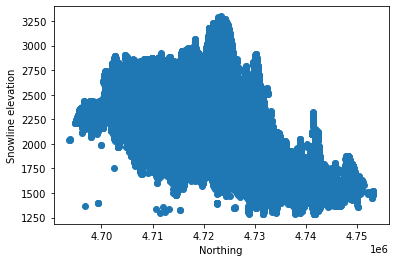

In [37]:
plt.scatter(Ysnowline, Zsnowline)
plt.xlabel('Northing')
plt.ylabel('Snowline elevation')
plt.show()

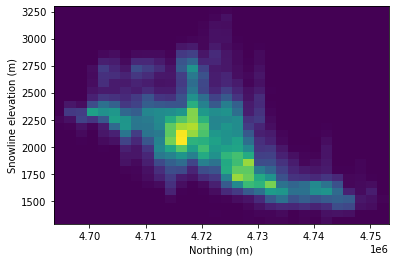

In [38]:
plt.hist2d(Ysnowline, Zsnowline, bins=(30, 30))
plt.xlabel('Northing (m)')
plt.ylabel('Snowline elevation (m)')
plt.show()

In [39]:
ZOnsnowline = np.where(snowline,Z,np.nan)
p90 = np.nanpercentile(ZOnsnowline,10,axis=1)

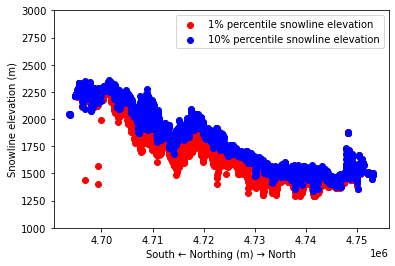

In [40]:
p10 = np.nanpercentile(ZOnsnowline,10,axis=1)
p1 = np.nanpercentile(ZOnsnowline,1,axis=1)
plt.scatter(y,p1,c='r',label='1% percentile snowline elevation')
plt.scatter(y,p10,c='b',label='10% percentile snowline elevation')
plt.xlabel('South ← Northing (m) → North')
plt.ylabel('Snowline elevation (m)')
plt.legend()
plt.ylim(1000,3000)
plt.show()

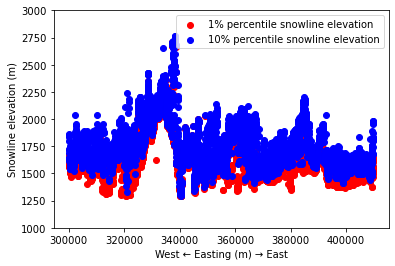

In [41]:
p10 = np.nanpercentile(ZOnsnowline,10,axis=0)
p1 = np.nanpercentile(ZOnsnowline,1,axis=0)
plt.scatter(x,p1,c='r',label='1% percentile snowline elevation')
plt.scatter(x,p10,c='b',label='10% percentile snowline elevation')
plt.xlabel('West ← Easting (m) → East')
plt.ylabel('Snowline elevation (m)')
plt.legend()
plt.ylim(1000,3000)
plt.show()

In [42]:
snowlineElevationNorth = np.nanpercentile(ZOnsnowline,1,axis=1)
northing = y
ix = np.logical_not(np.isnan(snowlineElevationNorth))
z = np.polyfit(northing[ix], snowlineElevationNorth[ix], 2)
p = np.poly1d(z)

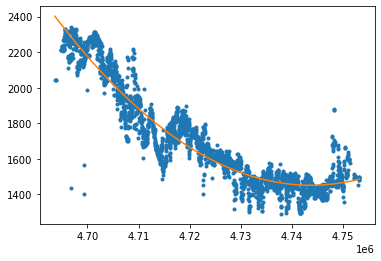

In [43]:
_ = plt.plot(northing[ix], snowlineElevationNorth[ix], '.', northing[ix], p(northing[ix]), '-')

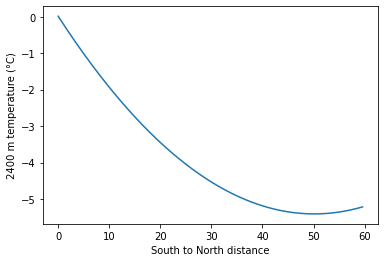

In [44]:
plt.plot((northing[ix]-northing[ix].min())/1000, 0.0057*(p(northing[ix])-2400), '-')
plt.xlabel('South to North distance')
plt.ylabel('2400 m temperature (°C)')
plt.show()